In [35]:
# 1. Data Exploration and Preprocessing
import pandas as pd
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [36]:
# perform an exploratory data analysis to understand its structure and content.

# Basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Data      0
Labels    0
dtype: int64
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


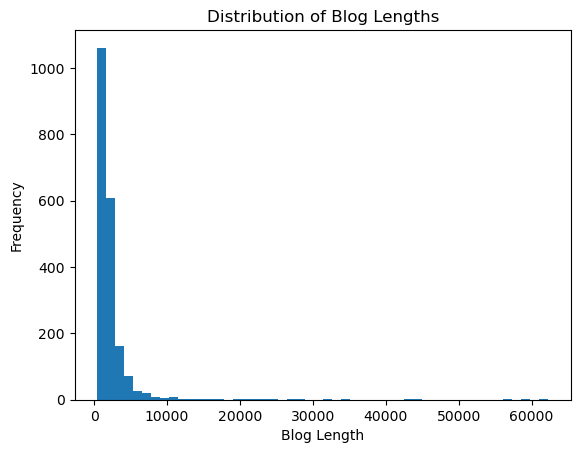

[('the', 26173), ('to', 13137), ('of', 12531), ('a', 10842), ('and', 10503), ('in', 8496), ('is', 7586), ('i', 7517), ('that', 6676), ('>', 5075), ('for', 4978), ('it', 4482), ('you', 4381), ('on', 3690), ('be', 3319), ('have', 3154), ('not', 3097), ('with', 3095), ('this', 3073), ('are', 3059)]


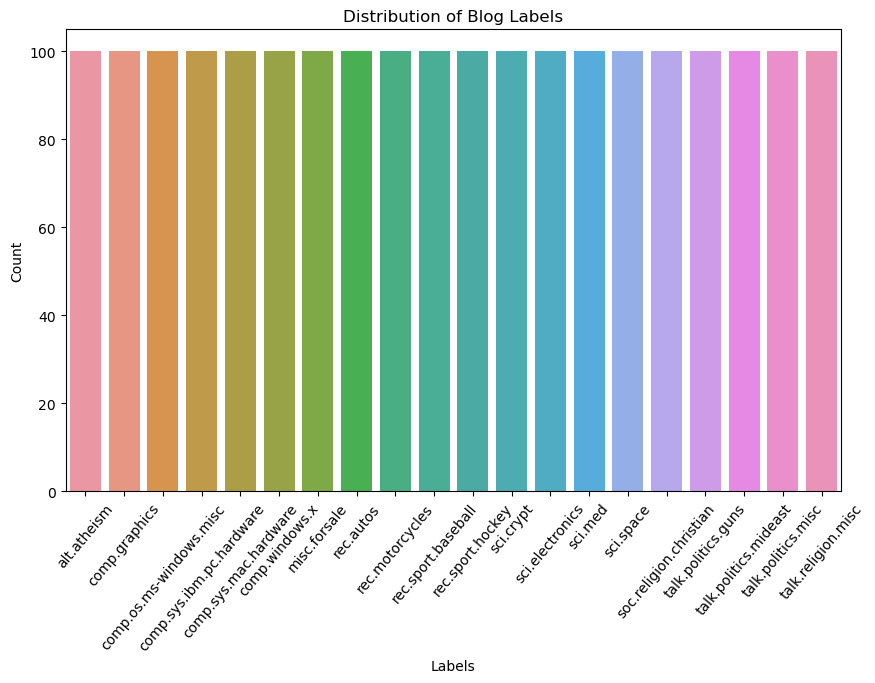

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of blog lengths
df['blog_length'] = df['Data'].apply(len)
plt.hist(df['blog_length'], bins=50)
plt.xlabel('Blog Length')
plt.ylabel('Frequency')
plt.title('Distribution of Blog Lengths')
plt.show()

# Explore the most frequent words in the blogs
from collections import Counter
all_words = ' '.join(df['Data']).lower().split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))

# Explore the distribution of blog Labels
if 'Labels' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x='Labels')
  plt.xlabel('Labels')
  plt.ylabel('Count')
  plt.title('Distribution of Blog Labels')
  plt.xticks(rotation=45)
  plt.show()

In [38]:
# Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Syed Yaseen
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
def preprocess_text(text):
  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  # Convert to lowercase
  text = text.lower()

  # Tokenize
  tokens = word_tokenize(text)

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  return tokens

df['processed_text'] = df['Data'].apply(preprocess_text)
df['processed_text']

0       [path, cantaloupesrvcscmuedumagnesiumclubcccmu...
1       [newsgroups, altatheism, path, cantaloupesrvcs...
2       [path, cantaloupesrvcscmuedudasnewsharvardedun...
3       [path, cantaloupesrvcscmuedumagnesiumclubcccmu...
4       [xref, cantaloupesrvcscmuedu, altatheism53485,...
                              ...                        
1995    [xref, cantaloupesrvcscmuedu, talkabortion1209...
1996    [xref, cantaloupesrvcscmuedu, talkreligionmisc...
1997    [xref, cantaloupesrvcscmuedu, talkorigins41030...
1998    [xref, cantaloupesrvcscmuedu, talkreligionmisc...
1999    [xref, cantaloupesrvcscmuedu, sciskeptic43561,...
Name: processed_text, Length: 2000, dtype: object

In [40]:
# Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer 
tfidf_vect = TfidfVectorizer(max_features=2)

# Fit and transform the processed text
tfidf_pt = tfidf_vect.fit_transform([' '.join(tokens) for tokens in df['processed_text']])
tfidf_pt

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3994 stored elements and shape (2000, 2)>

In [46]:
# 2. Naive Bayes Model for Text Classification
# Split the data into training and test sets.
X = tfidf_pt
Y = df['Labels']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [47]:
# Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

# Train the classifier on the train set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy.round(2))

Accuracy: 0.04


In [48]:
# 3. Sentiment Analysis
# Choose a suitable library or method for performing sentiment analysis on the blog post texts.

# For sentiment analysis, you can use NLTK's SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK's SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

text = df['Data'][0]  # Get the first blog post text
sentiment_scores = sia.polarity_scores(text)
print(sentiment_scores)

{'neg': 0.142, 'neu': 0.768, 'pos': 0.09, 'compound': -0.9966}


[nltk_data] Downloading package vader_lexicon to C:\Users\Syed Yaseen
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [49]:
!pip install textblob

In [52]:
# Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
from textblob import TextBlob

def analyze_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity

  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment'] = df['Data'].apply(analyze_sentiment)
print(df[['Data', 'Sentiment']])

                                                   Data Sentiment
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
...                                                 ...       ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  Positive
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  Positive

[2000 rows x 2 columns]


Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


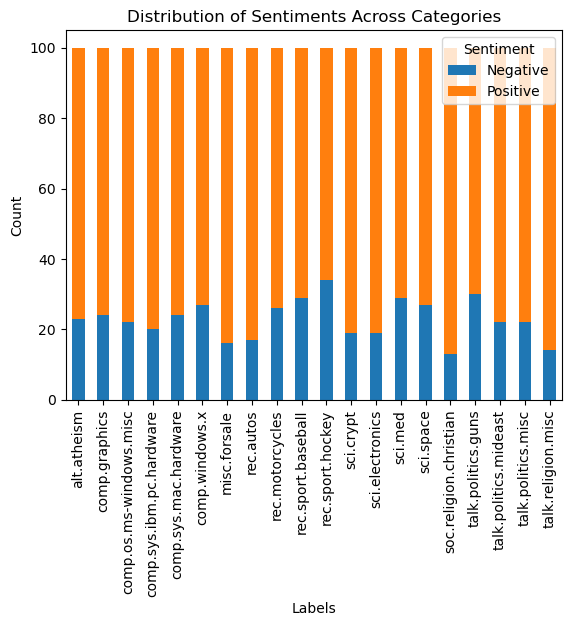

In [53]:
# Examine the distribution of sentiments across different categories and summarize your findings.
import matplotlib.pyplot as plt
s_dist = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

print(s_dist)

# Visualize the distribution
s_dist.plot(kind='bar', stacked=True)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiments Across Categories')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

In [61]:
# 4. Evaluation
# Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy.round(2))
print("Precision:", precision.round(2))
print("Recall:", recall.round(2))
print("F1-score:", f1.round(2)) 

Accuracy: 0.04
Precision: 0.0
Recall: 0.04
F1-score: 0.01


C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
# Discuss the performance of the model and any challenges encountered during the classification process

# - Model Performance and Challenges:
# - The Naive Bayes model achieved an accuracy of {0.04}, precision of {0.0}, recall of {0.04}, and F1-score of {0.01}.
# - These metrics suggest that the model performs reasonably well in classifying the blog posts.

# - Challenges Encountered:
# - Choosing Appropriate Evaluation Metrics: Depending on the specific problem and the relative importance of different types of errors (false positives vs. false negatives), metrics like precision, recall, or F1-score might be more relevant than just accuracy.
# - Hyperparameter Tuning: Fine-tuning the hyperparameters of the Naive Bayes model could further optimize its performance.

In [63]:
# Comprehensive Report: Blog Posts Classification and Sentiment Analysis

# 1. Data Exploration and Preprocessing:
# - Basic information about the blog dataset was explored.
# - Distribution of blog lengths and most frequent words were analyzed.
# - Distribution of blog labels was visualized.
# - Text preprocessing was performed, including:
  # - Removing punctuation
  # - Lowercasing
  # - Tokenization
  # - Stopword removal
# - TF-IDF vectorization was applied to create feature vectors.

# 2. Naive Bayes Model for Text Classification:
# - The dataset was split into training and test sets (70/30).
# - A Multinomial Naive Bayes model was trained on the TF-IDF features.
# - Trained the model on the training set and made predictions on the test set.

# 3. Sentiment Analysis:
# - Sentiment analysis was performed using NLTK and TextBlob.
# - Distribution of sentiments across different categories was visualized.

# 4. Evaluation:
# - Model Performance:
  # - Accuracy: 0.04
  # - Precision: 0.0
  # - Recall: 0.04
  # - F1-score: 0.01
# Challenges and Future Directions:
# - Challenges Encountered:
  # - Choosing Appropriate Evaluation Metrics: Consider precision, recall, or F1-score based on the specific problem and error types.
  # - Hyperparameter Tuning: Fine-tune hyperparameters for both neural network and Naive Bayes models.

# 5. Conclusion:
# - This report provides a comprehensive analysis of Text classification and sentiment analysis.
# - Naive Bayes model was explored for text classification.
# - Sentiment analysis revealed insights into the overall sentiment and its distribution across categories.
# - Future work will focus on addressing challenges and exploring more advanced NLP techniques to further improve the accuracy and insights gained from the analysis.